In [34]:
import pandas as pd
import numpy as np

In [35]:
stations = ['jfk', 'lga', 'nyc']
columns = ['station', 'model', 'runtime', 'ftime', 'n_x', 'tmp', 'dpt', 'cld',
           'wdr', 'wsp', 'p06', 'p12', 'q06', 'q12', 't06', 't12', 'snw', 'cig',
           'vis', 'obv', 'poz', 'pos', 'typ']
# quant columns come from https://mesonet.agron.iastate.edu/mos/fe.phtml
#http://www.nws.noaa.gov/mdl/synop/mavcard.php
float_cols =['n_x', 'tmp', 'dpt', 'wdr', 'wsp', 'p06', 'p12', 'q06', 'q12', 'poz', 'pos']
cat_cols = ['cld', 'snw', 'cig', 'vis', 'obv']
fraction_cols = ['t06', 't12']
quant_cols = float_cols + fraction_cols
codes = {'cld':{'CL':0, 'FW':1, 'SC':2, 'BK':3, 'OV':4}, 
         'obv':{'N':0, 'HZ':1, 'BR':2, 'FG':3, 'BL':4},
         'snw':{'0':0,'1':1,'2':2,'4':3,'6':4,'8':5},
         'vis':{'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7},
         'cig':{'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8}}

In [36]:
ls "../../CSV_Data/"

mos_jfk.csv  mos_lga.csv  mos_nyc.csv  obs_nyc.csv


In [37]:
mos = dict()
for station in stations:
    mos[station] = pd.read_csv(f'../../CSV_Data/mos_{station}.csv', names=columns, low_memory=False)
    mos[station].drop(0, axis=0, inplace=True)
    mos[station][float_cols] = mos[station][float_cols].astype(float)
    mos[station]['date'] = pd.to_datetime(mos[station]['runtime'])
    mos[station].set_index('date', inplace=True)

In [38]:
obs_df = pd.read_csv("../../CSV_Data/obs_nyc.csv")

In [39]:
obs = dict()

for nm, (st, df) in zip(stations, obs_df.groupby('NAME')):
    obs[nm] = df.copy()
    obs[nm]['date'] = pd.to_datetime(obs[nm]['DATE'])
    obs[nm].set_index('date', inplace=True)
    

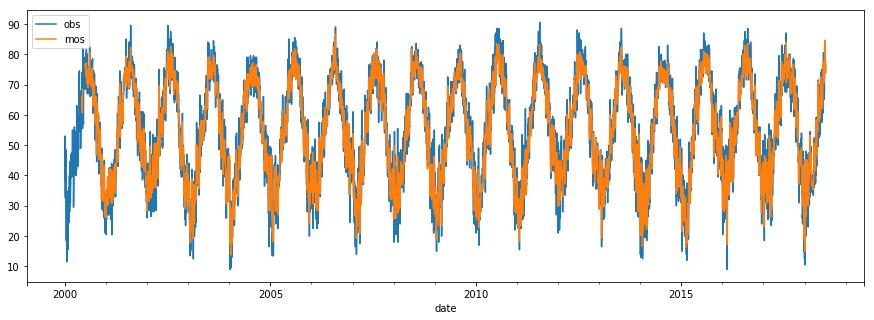

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,5))
_ = obs['jfk'][['TMAX','TMIN']].mean(axis=1).plot(ax=ax, label='obs')
_ = mos['jfk']['tmp'].resample('d').mean().plot(ax=ax, label="mos")
_ = ax.legend()
#user created observation over the mos mean for temperature at jfk station
#the mos usually underestimates how hot or how cold the temp would be 

In [8]:
mos['jfk']['tmp'].resample?

Object `resample` not found.


In [ ]:
mos['jfk']['tmp'].resample

In [9]:
mos['jfk']['tmp'].resample

<bound method NDFrame.resample of date
2000-05-30 12:00:00    61.0
2000-05-30 12:00:00    61.0
2000-05-30 12:00:00    56.0
2000-05-30 12:00:00    54.0
2000-05-30 12:00:00    53.0
2000-05-30 12:00:00    52.0
2000-05-30 12:00:00    57.0
2000-05-30 12:00:00    64.0
2000-05-30 12:00:00    67.0
2000-05-30 12:00:00    64.0
2000-05-30 12:00:00    59.0
2000-05-30 12:00:00    60.0
2000-05-30 12:00:00    61.0
2000-05-30 12:00:00    60.0
2000-05-30 12:00:00    63.0
2000-05-30 12:00:00    67.0
2000-05-30 12:00:00    70.0
2000-05-30 12:00:00    69.0
2000-05-30 12:00:00    66.0
2000-05-30 12:00:00    64.0
2000-05-30 12:00:00    68.0
2000-05-31 00:00:00    51.0
2000-05-31 00:00:00    50.0
2000-05-31 00:00:00    56.0
2000-05-31 00:00:00    64.0
2000-05-31 00:00:00    68.0
2000-05-31 00:00:00    65.0
2000-05-31 00:00:00    60.0
2000-05-31 00:00:00    60.0
2000-05-31 00:00:00    60.0
                       ... 
2018-07-08 18:00:00    76.0
2018-07-08 18:00:00    82.0
2018-07-08 18:00:00    86.0
2018-07-0

In [10]:
mos['jfk']['tmp'].resample('d').mean()

date
2000-05-30    61.714286
2000-05-31    66.119048
2000-06-01          NaN
2000-06-02          NaN
2000-06-03    63.571429
2000-06-04    61.642857
2000-06-05    60.595238
2000-06-06    65.119048
2000-06-07    68.452381
2000-06-08          NaN
2000-06-09          NaN
2000-06-10          NaN
2000-06-11          NaN
2000-06-12          NaN
2000-06-13          NaN
2000-06-14          NaN
2000-06-15          NaN
2000-06-16          NaN
2000-06-17          NaN
2000-06-18          NaN
2000-06-19          NaN
2000-06-20          NaN
2000-06-21          NaN
2000-06-22          NaN
2000-06-23          NaN
2000-06-24          NaN
2000-06-25          NaN
2000-06-26          NaN
2000-06-27          NaN
2000-06-28          NaN
                ...    
2018-06-10    64.392857
2018-06-11    66.511905
2018-06-12    69.202381
2018-06-13    70.630952
2018-06-14    72.369048
2018-06-15    73.285714
2018-06-16    75.785714
2018-06-17    77.571429
2018-06-18    76.400000
2018-06-19    74.869048
2018-06-20 

In [11]:
mos['jfk']['tmp']['2000-05-30'].mean()

61.714285714285715

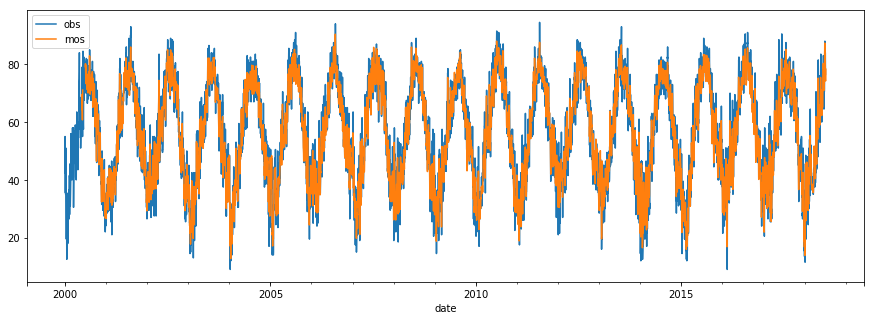

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,5))
_ = obs['lga'][['TMAX','TMIN']].mean(axis=1).plot(ax=ax, label='obs')
_ = mos['lga']['tmp'].resample('d').mean().plot(ax=ax, label="mos")
_ = ax.legend()
#user created observation over the mos mean for temperature at lga station 

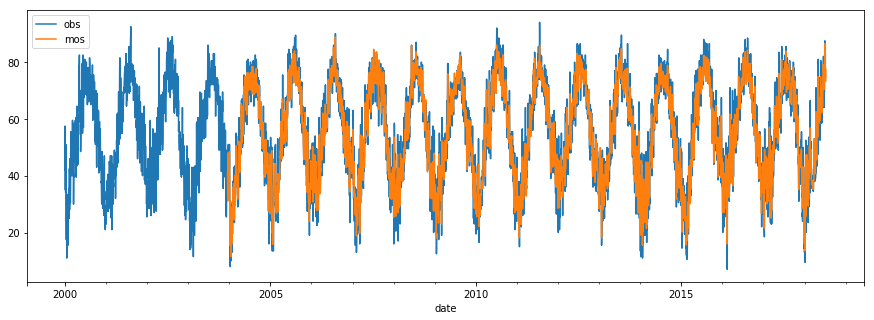

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,5))
_ = obs['nyc'][['TMAX','TMIN']].mean(axis=1).plot(ax=ax, label='obs')
_ = mos['nyc']['tmp'].resample('d').mean().plot(ax=ax, label="mos")
_ = ax.legend()
#user created observation over the mos mean for temperature at central park station 

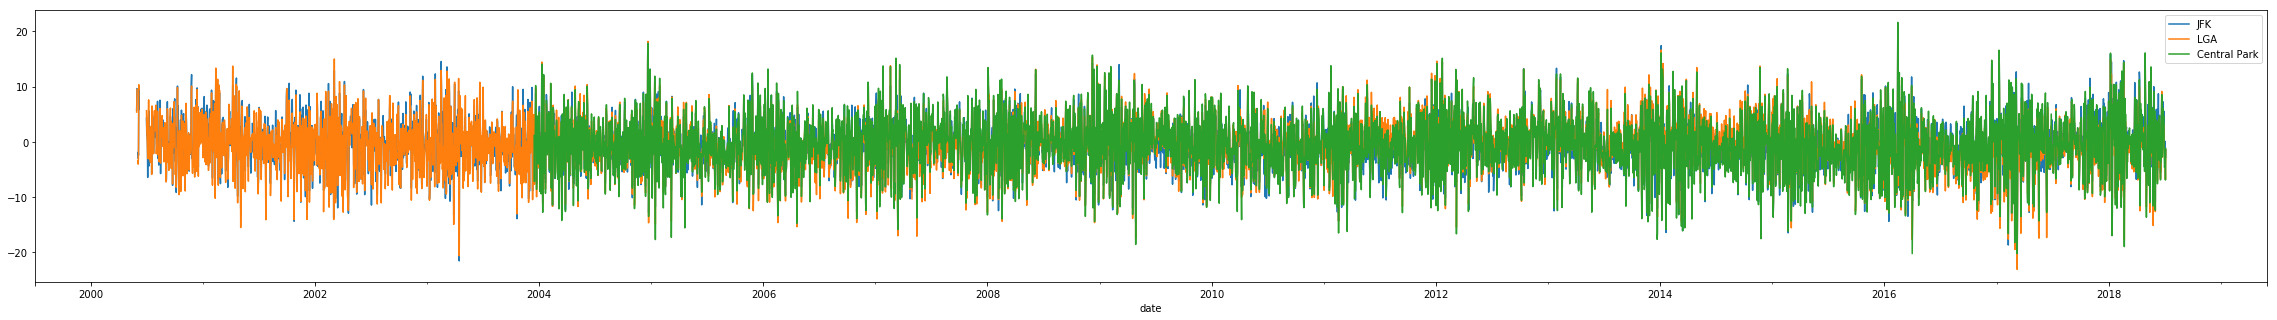

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(40,5))

_ = (mos['jfk']['tmp'].resample('d').mean() - obs['jfk'][['TMAX','TMIN']].mean(axis=1)).plot(ax=ax, label='JFK')
_ = (mos['lga']['tmp'].resample('d').mean() - obs['lga'][['TMAX','TMIN']].mean(axis=1)).plot(ax=ax, label='LGA')                                                                                       
_ = (mos['nyc']['tmp'].resample('d').mean() - obs['nyc'][['TMAX','TMIN']].mean(axis=1)).plot(ax=ax, label='Central Park')
_ = ax.legend()
#mos minus the observation(bias) for temperature at all 3 NY stations 



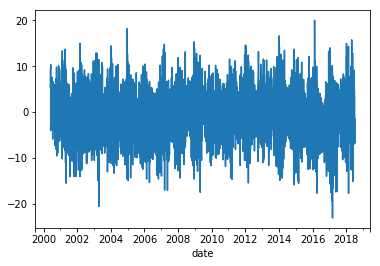

In [15]:
(mos['lga']['tmp'].resample('d').mean() - obs['lga'][['TMAX','TMIN']].mean(axis=1)).plot()
#lga bias

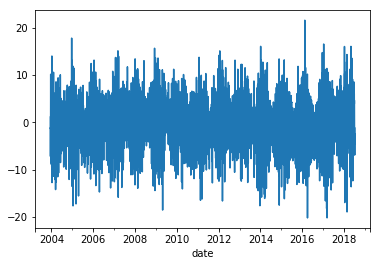

In [16]:
(mos['nyc']['tmp'].resample('d').mean() - obs['nyc'][['TMAX','TMIN']].mean(axis=1)).plot()
#central park bias

In [17]:
d1 = (mos['jfk']['tmp'].resample('d').mean() - obs['jfk'][['TMAX','TMIN']].mean(axis=1))
d2 = (mos['lga']['tmp'].resample('d').mean() - obs['lga'][['TMAX','TMIN']].mean(axis=1))                                                                             
d3 = (mos['nyc']['tmp'].resample('d').mean() - obs['nyc'][['TMAX','TMIN']].mean(axis=1))

In [18]:
bias = pd.concat([d1,d2,d3], axis=1, keys=['jfk', 'lga', 'nyc'])
#bias from observations for all 3 stations 'concated'

In [19]:
bias.corr()
#the correlation of the bias between all of the stations is very high,
#indicating that topography may not affect how the bias looks like between
#the three stations with regards to temperature.

,jfk,lga,nyc
jfk,1.000000,0.90615,0.909191
lga,0.906150,1.00000,0.959430
nyc,0.909191,0.95943,1.000000


In [20]:
obs_df.keys

<bound method NDFrame.keys of            STATION                              NAME  LATITUDE  LONGITUDE  \
0      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
1      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
2      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
3      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
4      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
5      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
6      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
7      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
8      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
9      USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
10     USW00094728       NY CITY CENTRAL PARK, NY US  40.77898  -73.96925   
11     USW00094728       NY CITY CENTRAL PARK,

In [21]:
d4 = (mos['jfk']['tmp'].resample('d').mean())
d5 = (mos['lga']['tmp'].resample('d').mean())                                                                      
d6 = (mos['nyc']['tmp'].resample('d').mean())

In [22]:
mos_c = pd.concat([d4,d5,d6], axis=1, keys=['jfk', 'lga', 'nyc'])
mos_c
#temperature mean from mos for all 3 stations 'concated'

,jfk,lga,nyc
date,,,
2000-05-30,61.714286,64.380952,NaN
2000-05-31,66.119048,69.476190,NaN
2000-06-01,NaN,NaN,NaN
2000-06-02,NaN,NaN,NaN
2000-06-03,63.571429,65.095238,NaN
2000-06-04,61.642857,62.476190,NaN
2000-06-05,60.595238,60.738095,NaN
2000-06-06,65.119048,65.333333,NaN
2000-06-07,68.452381,71.095238,NaN


In [23]:
d7 = obs['jfk'][['TMAX','TMIN']].mean(axis=1)
d8 = obs['lga'][['TMAX','TMIN']].mean(axis=1)
d9 = obs['nyc'][['TMAX','TMIN']].mean(axis=1)

In [24]:
obs_c = pd.concat([d7,d8,d9], axis=1, keys=['jfk', 'lga', 'nyc'])
#temperature mean from observations for all 3 stations 'concated' 

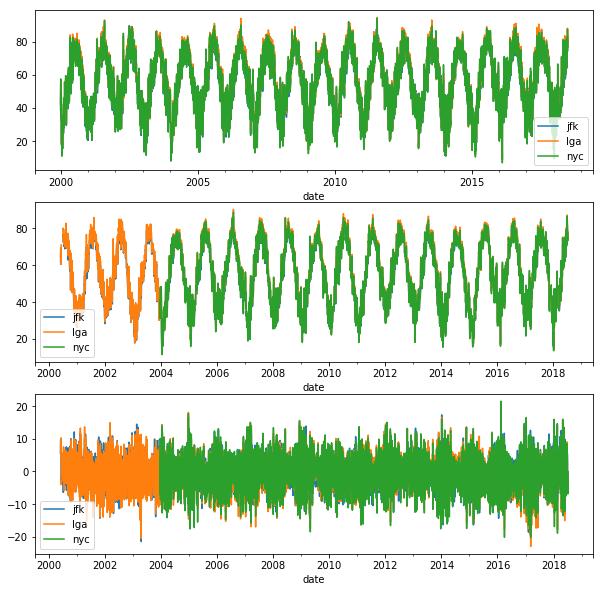

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,figsize=(10,10))

obs_c.plot(ax=ax1)
mos_c.plot(ax=ax2)
bias.plot(ax=ax3)

In [26]:
mos_jfk_wsp = mos['jfk']['wsp'].astype(float) * 1.152
mos_lga_wsp = mos['lga']['wsp'].astype(float) * 1.152
mos_nyc_wsp = mos['nyc']['wsp'].astype(float) * 1.152

#mos_jfk_wsp - (obs['jfk']['AWND']).astype(float).plot()
#obs_jfk_AWND = obs['jfk'][['AWND']].astype(float)
#mos_jfk_wsp - obs_jfk_AWND
#mos['jfk']['wsp'] - obs['jfk']['AWND']
#mos_jfk_wsp.index
#obs_jfk_AWND.index




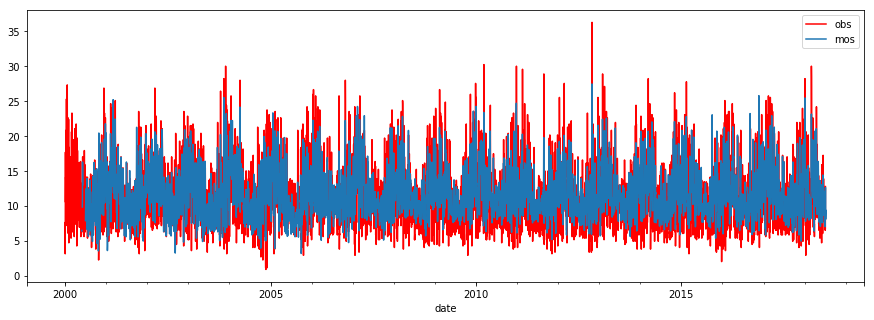

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,5))
_ = obs['jfk'][['AWND']].mean(axis=1).plot(ax=ax, label='obs',color='red')
_ = mos_jfk_wsp.resample('d').mean().plot(ax=ax, label="mos")
_ = ax.legend()

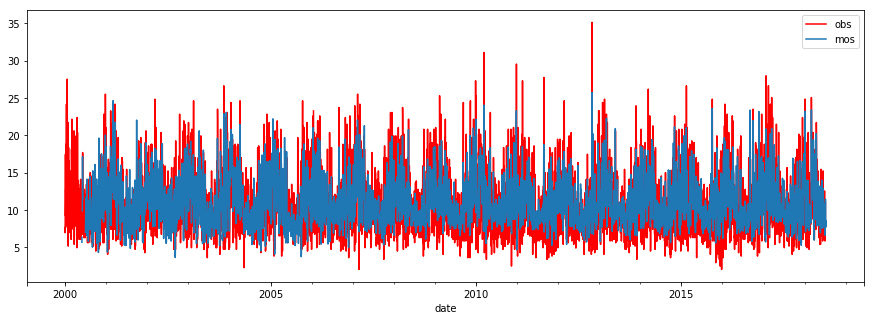

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,5))
_ = obs['lga'][['AWND']].mean(axis=1).plot(ax=ax, label='obs',color='red')
_ = mos_lga_wsp.resample('d').mean().plot(ax=ax, label="mos")
_ = ax.legend()

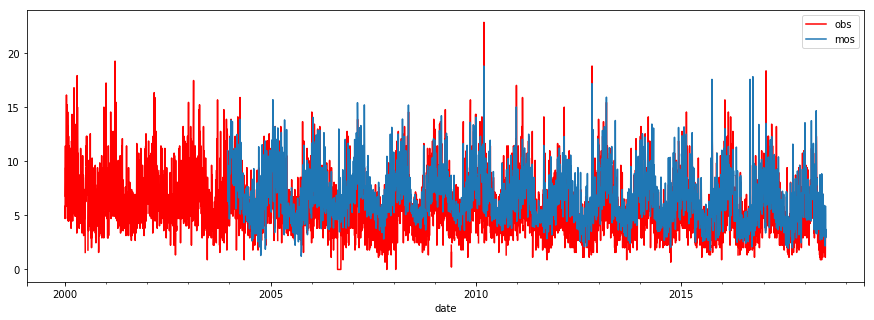

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,5))
_ = obs['nyc'][['AWND']].mean(axis=1).plot(ax=ax, label='obs',color='red')
_ = mos_nyc_wsp.resample('d').mean().plot(ax=ax, label="mos",)
_ = ax.legend()

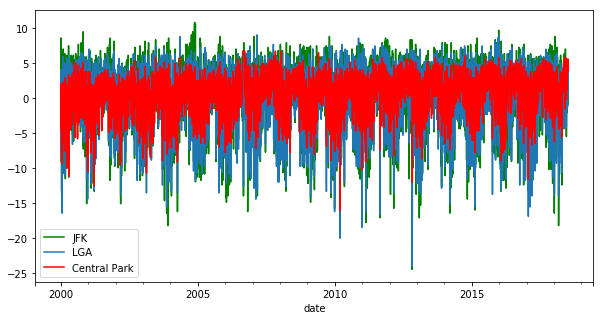

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,5))


_ = (mos_jfk_wsp.mean() - obs['jfk'][['AWND']].mean(axis=1).astype(float)).plot(ax=ax, label='JFK',color='green') 
_ = (mos_lga_wsp.mean() - obs['lga'][['AWND']].mean(axis=1).astype(float)).plot(ax=ax, label='LGA')
_ = (mos_nyc_wsp.mean() - obs['nyc'][['AWND']].mean(axis=1).astype(float)).plot(ax=ax, label='Central Park',color='red')
_ = ax.legend()

In [31]:
obs['lga'][['AWND']].head()
mos_lga_wsp.head()

date
2000-05-30 12:00:00    16.128
2000-05-30 12:00:00    16.128
2000-05-30 12:00:00    13.824
2000-05-30 12:00:00    10.368
2000-05-30 12:00:00     6.912
Name: wsp, dtype: float64

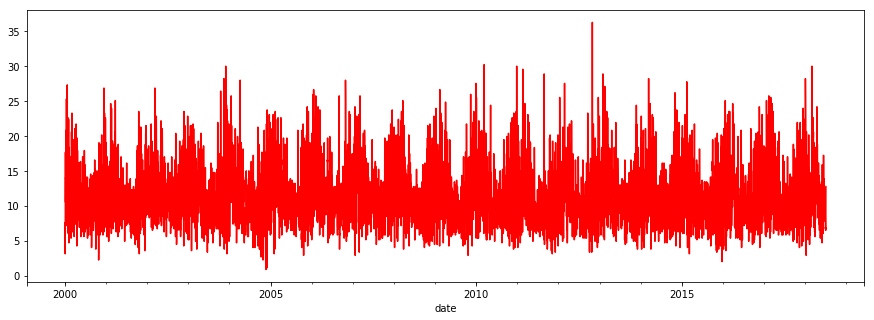

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,5))
_ = obs['jfk'][['AWND']].mean(axis=1).plot(ax=ax, label='obs',color='red')

In [43]:
obs['jfk'][['AWND']]

,AWND
date,
2000-01-01,7.38
2000-01-02,7.61
2000-01-03,3.13
2000-01-04,14.54
2000-01-05,17.67
2000-01-06,10.51
2000-01-07,14.09
2000-01-08,13.42
2000-01-09,7.16
